# BAB PENGENALAN

   ##### Nama  : Farand Austen Mahesa
   ##### Kelas : Full Bootcamp Data Science

Tujuan Program
> Deteksi penipuan adalah salah satu dari banyak kasus deteksi anomali merupakan aspek penting dari pasar keuangan. Program ini nanti akan memprediksi apakah suatu transaksi curang atau tidak berdasarkan riwayat transaksi dengan suatu dataset yang diberikan.

Isi notebook dibawah ini berupa:
   - Perkenalan
   - Import pustaka yang dibutuhkan
   - Data Loading
   - Data Cleaning
   - Eksplorasi Data
   - Data Preprocessing
   - Pendefinisian Model
   - Pelatihan Model
   - Evaluasi Model
   - Model Inference
   - Pengambilan Kesimpulan

# IMPORT DATA PUSTAKA

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# PREPROCESSING

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Terlihat tidak ada data yang kategorikal, dan semua data adalah numerik dan tidak ada data kosong pada dataset tersebut.

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Tidak ada data yang kosong

# EDA

In [9]:
def histogram_attribute():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7','V8']
    
    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.histplot(x=u, data=df, hue='Class', ax=ax, bins=10, kde=True, color ='blues')
        ax.set_title(f'Histogram: {u}.')
    plt.show()
    
def histogram_attribute1():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['V9','V10', 'V11','V12','V13', 'V14', 'V15', 'V16','V17']
    
    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.histplot(x=u, data=df, hue='Class', ax=ax, bins=10, kde=True)
        ax.set_title(f'Histogram: {u}.')
    plt.show() 
    
def histogram_attribute2():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['V18','V19', 'V20','V21','V22', 'V23', 'V24', 'V25','V26']
    
    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.histplot(x=u, data=df, hue='Class', ax=ax, bins=10, kde=True)
        ax.set_title(f'Histogram: {u}.')
    plt.show()        

def histogram_attribute3():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['V27','V28', 'Amount', 'Class']
    
    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.histplot(x=u, data=df, hue='Class', ax=ax, bins=10, kde=True)
        ax.set_title(f'Histogram: {u}.')
    plt.show()    

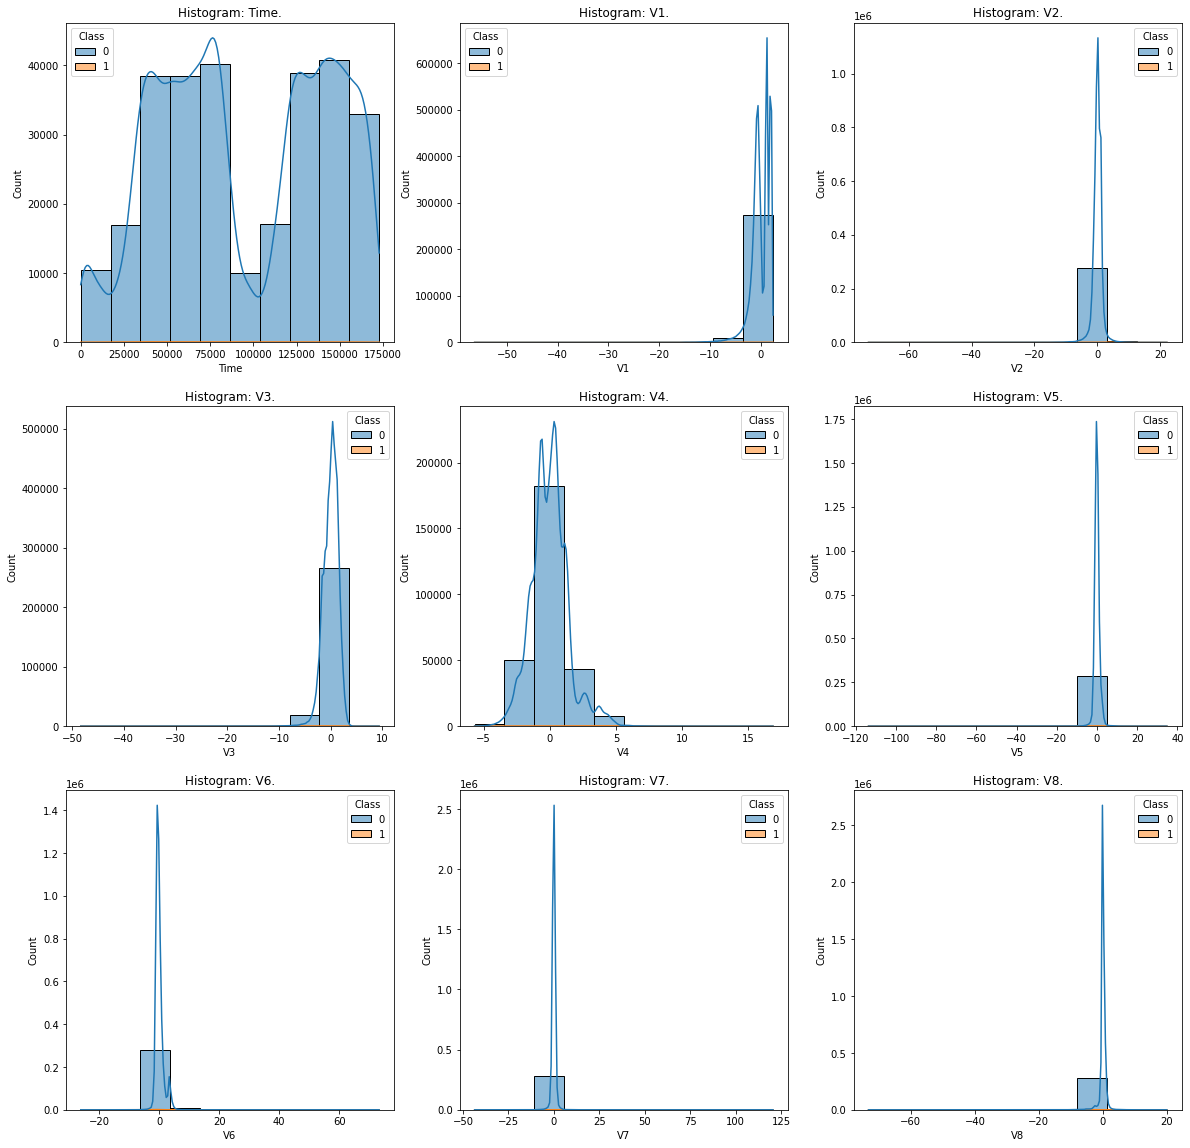

In [10]:
histogram_attribute()

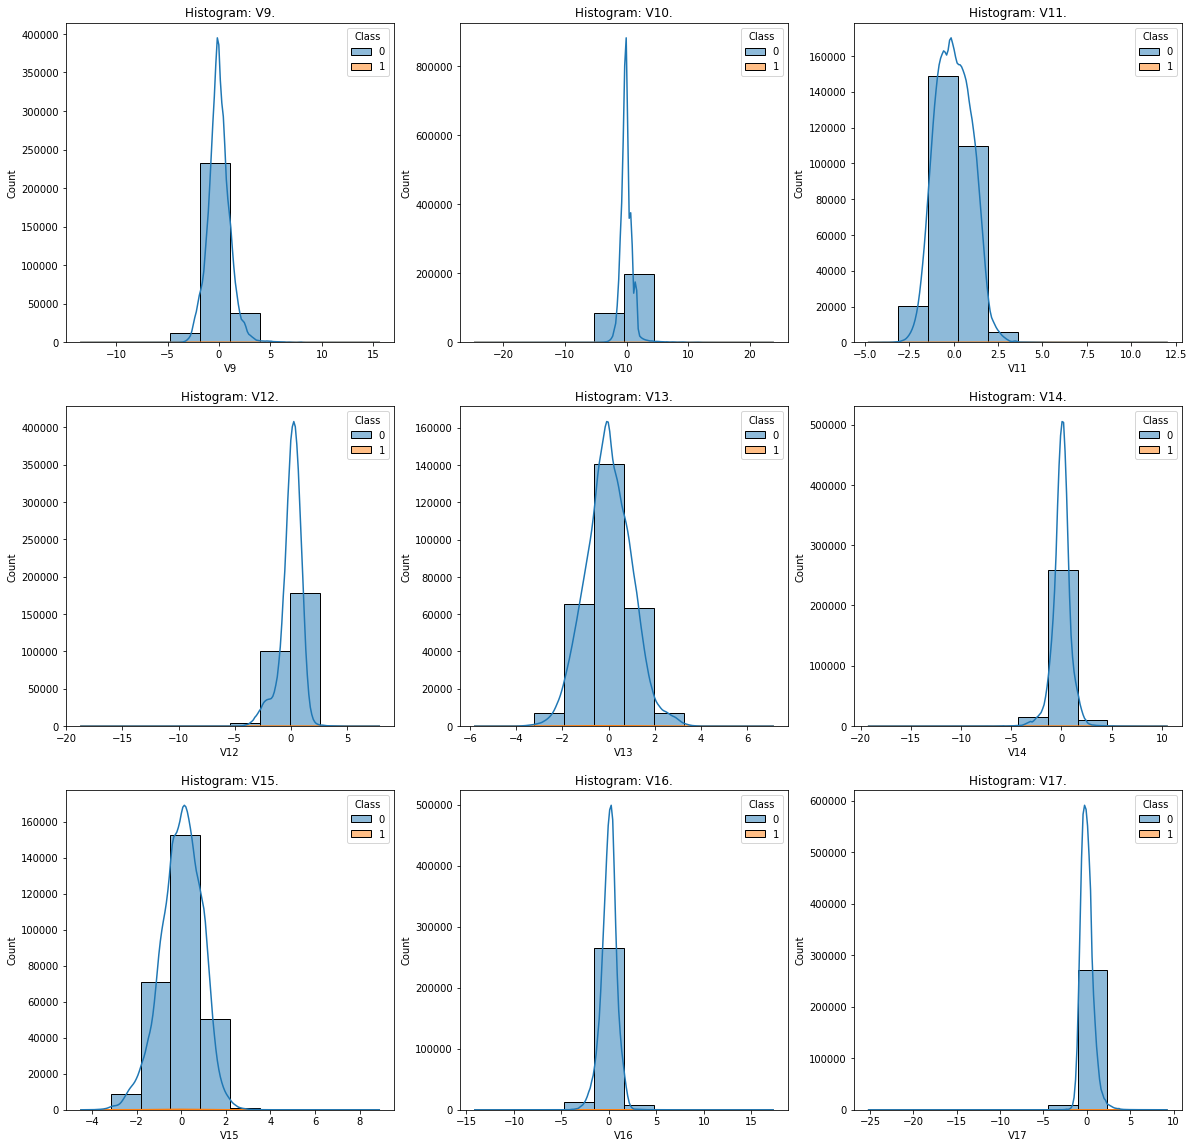

In [11]:
histogram_attribute1()

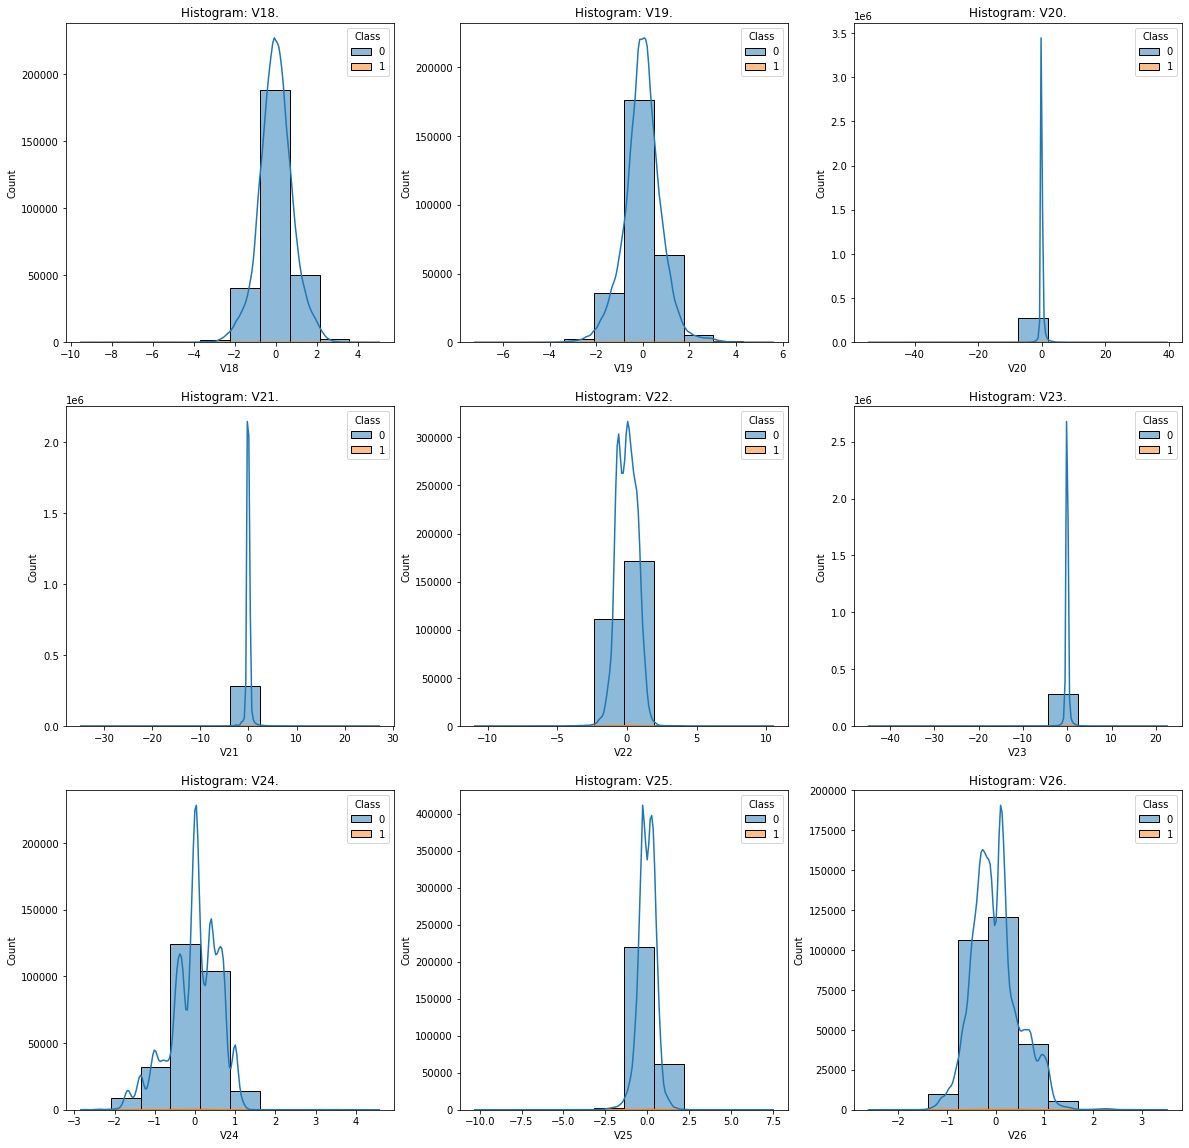

In [12]:
histogram_attribute2()

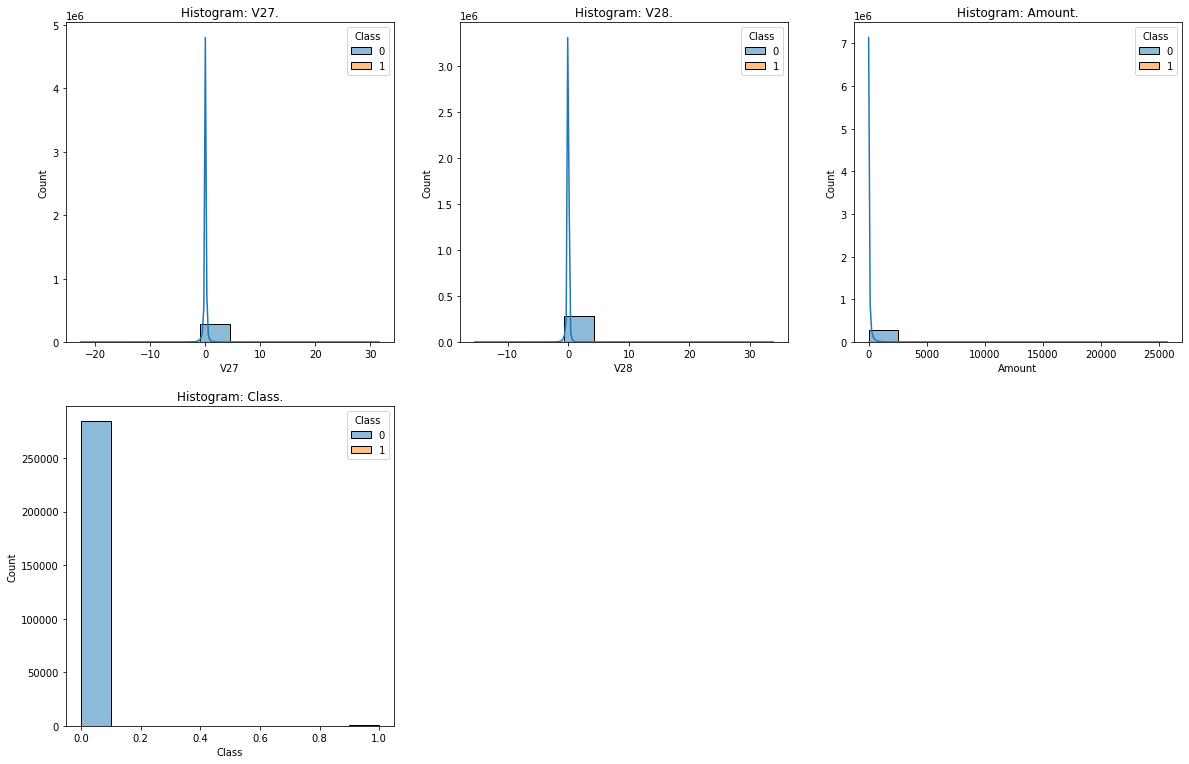

In [13]:
histogram_attribute3()

<AxesSubplot:>

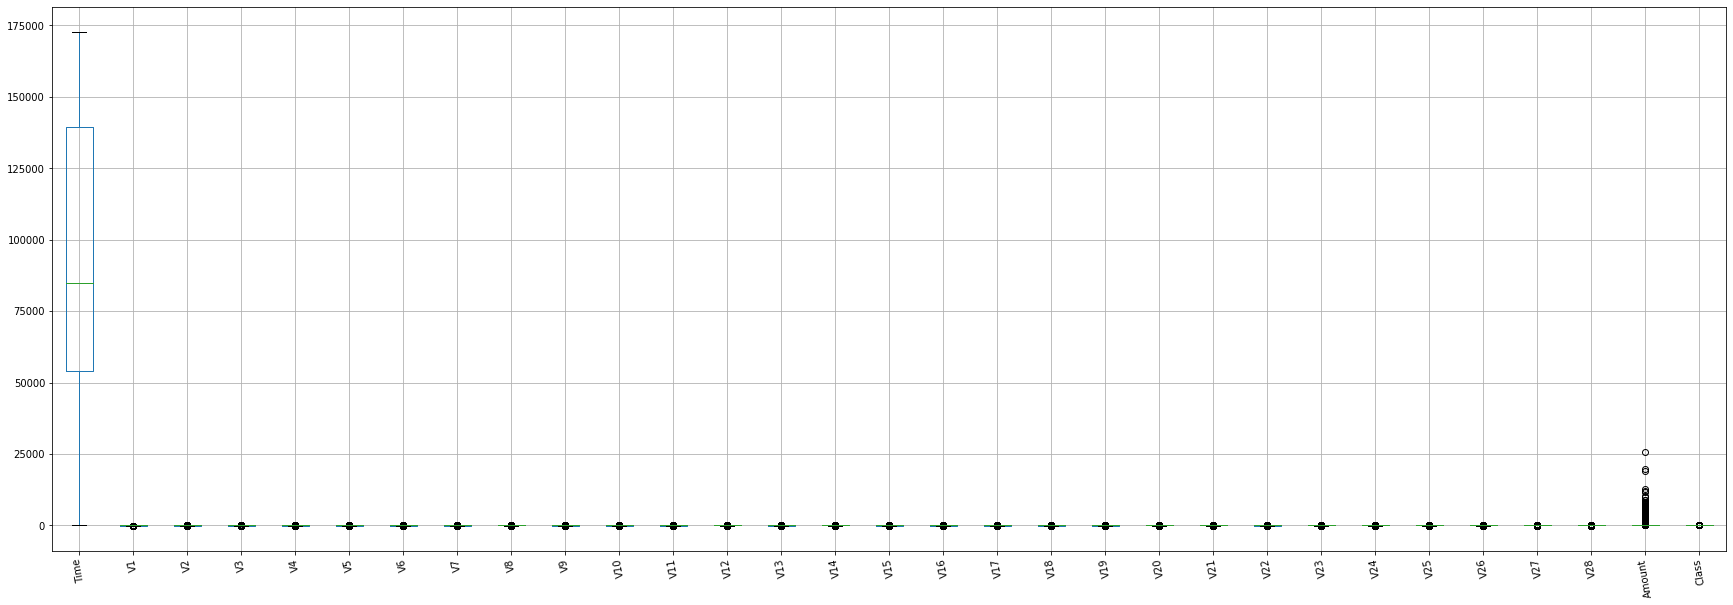

In [14]:
df.boxplot(rot=100, figsize=(30,10))

<AxesSubplot:>

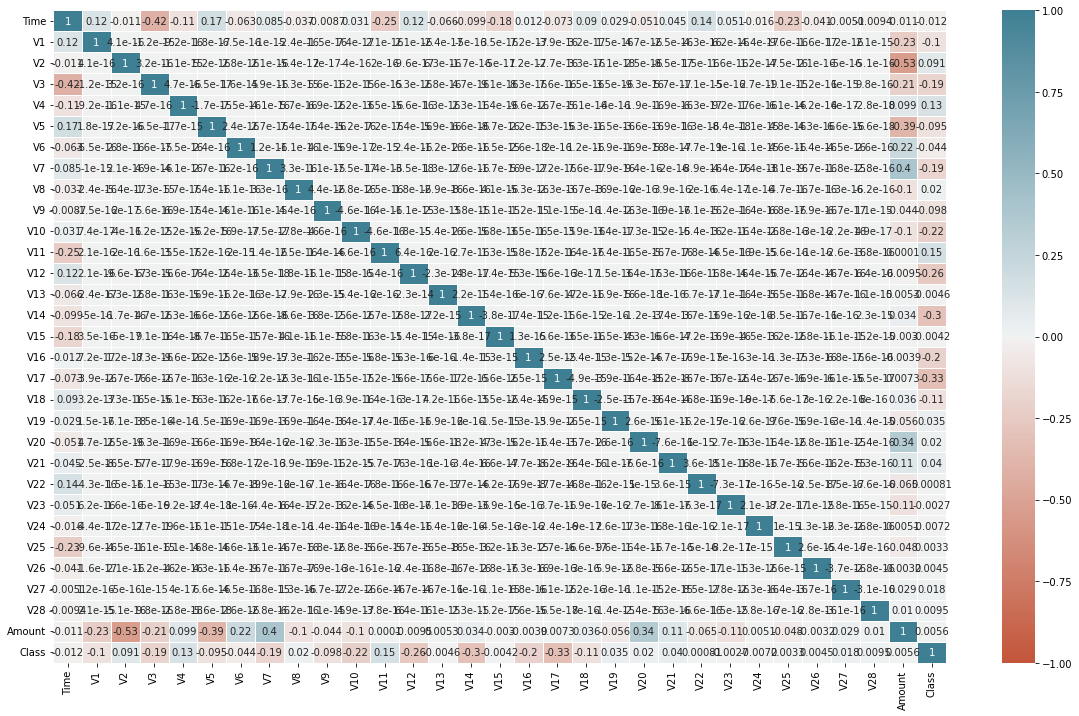

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

# EDA ANALYSIS

- Dataset ini sudah bagus dari awal karena V1-V28 sudah direduksi datanya
- Terlihat tidak ada data yang kategorikal, dan semua data adalah numerik dan tidak ada data kosong pada dataset tersebut.
- Jumlah Uang, waktu dan data kelas dimana kelas ini nanti menjadi bagian prediksi apakah pada records itu termasuk kelas penipuan atau kelas data yang normal itu belum direduksi
- Kalo diliat distribusinya dalam kelas, kelas data normal masih banyak dibanding dengan data pencurian, dimana deteksi pada kelas pencurian data sebanyak 492 data
- Kolom V1-V28 termasuk hasil reduksi dari PCA untuk menjaga identitas pengguna dan fitur-fitur yang sensitif sehingga jika ada data baru yang masuk tidak akan dijadikan data itu, tetapi dijadikan data baru lain.
- Dari data V1-V28 tidak ada yang berkorelasi artinya setiap data tidak mempengaruhi satu dengan yang lainnya atau independen
- Korelasi negativ dengan kelasnya: V17, V14, V12 and V10 adalah korelasi negatif. Jika angka pada data tersebut semakin rendah, maka angka tersebut diindentifikasikan adalah kelas pencurian
- Korelasi positif dengan kelasnya: V2, V4, V11, and V19 are korelasi positif. Jika angka pada data tersebut semakin tinggi, maka angka tersebut diindentifikasikan adalah kelas pencurian
- Jika hanya beberapa kolom yang didrop kemungkinan tidak akan mempengaruhi apakah data tersebut termasuk kelas pencurian atau data yang normal saja
- Data dari V1-V28 kebanyakan rata-ratanya adalah 4x10e-15, dan rata-ratanya ada yang negatif
- Penditribusian pada data waktu memiliki 2 lonceng yang artinya bersifat multimodal dan rata-ratanya ada di 2 tempat
- Pada amount jika dilihat dari data tersebut minimalnya adalah 0, dan meannya adalah 88. Tetapi jika dilihat dari maksimalnya maka data amount itu memiliki angka 25.000. Dan data tersebut sangat timpang jika dibandingkan dengan rata-ratanya
- Jika dilihat data dari V1-V28 banyak yang skew kiri maupun skew kanan artinya banyak outliers terdeteksi tetapi jika dilihat dari boxplot tidak terdapat beberapa outliers, oleh karena itu akan dilakukan deteksi anomali untuk kasus ini, dikarenakan jika dilihat dari boxplot tidak terlihat outliers, sedangkan banyak data yg skew kanan dan kiri. Outliers pada box plot menjadi samar dikarenakan datanya berjumlah banyak.

# ANOMALI DETECTION

<AxesSubplot:>

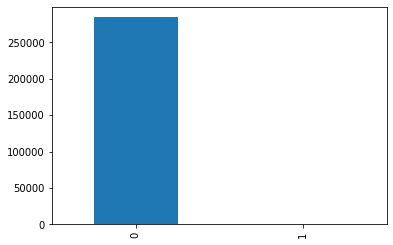

In [16]:
df.Class.value_counts().plot(kind='bar')

Fraud detection terdeteksi 492 data, berbanding jauh dengan normal detectionnya yang mempunyai 280.000 data sehingga angka pada kelas pencurian tersebut menjadi samar dan tidak terlihat sama sekali.

In [17]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
X = df.drop(columns=['Time','Class','Amount'])
y = df['Class']

In [19]:
X.to_numpy()

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [20]:
scaler = StandardScaler()
X_reduced2 = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
X_reduced1 = PCA(n_components=1).fit_transform(X_reduced2)

In [21]:
X_reduced=np.append(X, X_reduced1,axis=1)

In [22]:
(np.count_nonzero(np.isnan(X_reduced)))

0

Dikarenakan V1 - V28 sudah di PCA maka yang di PCA adalah Amountnya dan dimasukkan amountnya kedalam kelompok V1-V28 yang sudah direduced

# GAUSSIAN MIXTURE

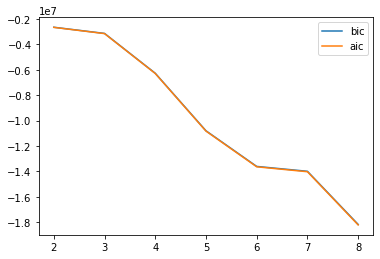

In [23]:
n_gauss=[2,3,4,5,6,7,8]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g).fit(X_reduced)
    bic.append(gm.bic(X_reduced))
    aic.append(gm.aic(X_reduced))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()

AIV dan BIC pada gaussian mixture tersebut, maka komponen yang dipilih adalah 8, karena semakin rendah AIC dan BIC maka semakin rendah errornya dan hasilnya menjadi lebih bagus 

In [24]:
gausMix = GaussianMixture(n_components=8).fit(X_reduced)
print(gausMix)

GaussianMixture(n_components=8)


In [25]:
scores = gausMix.score_samples(X_reduced)

thresh = np.quantile(scores, 0.001)
print(thresh)

-93.44594735172103


Jika positif makin banyak, berarti semakin banyak anomali yang terdeteksi

C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda33\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


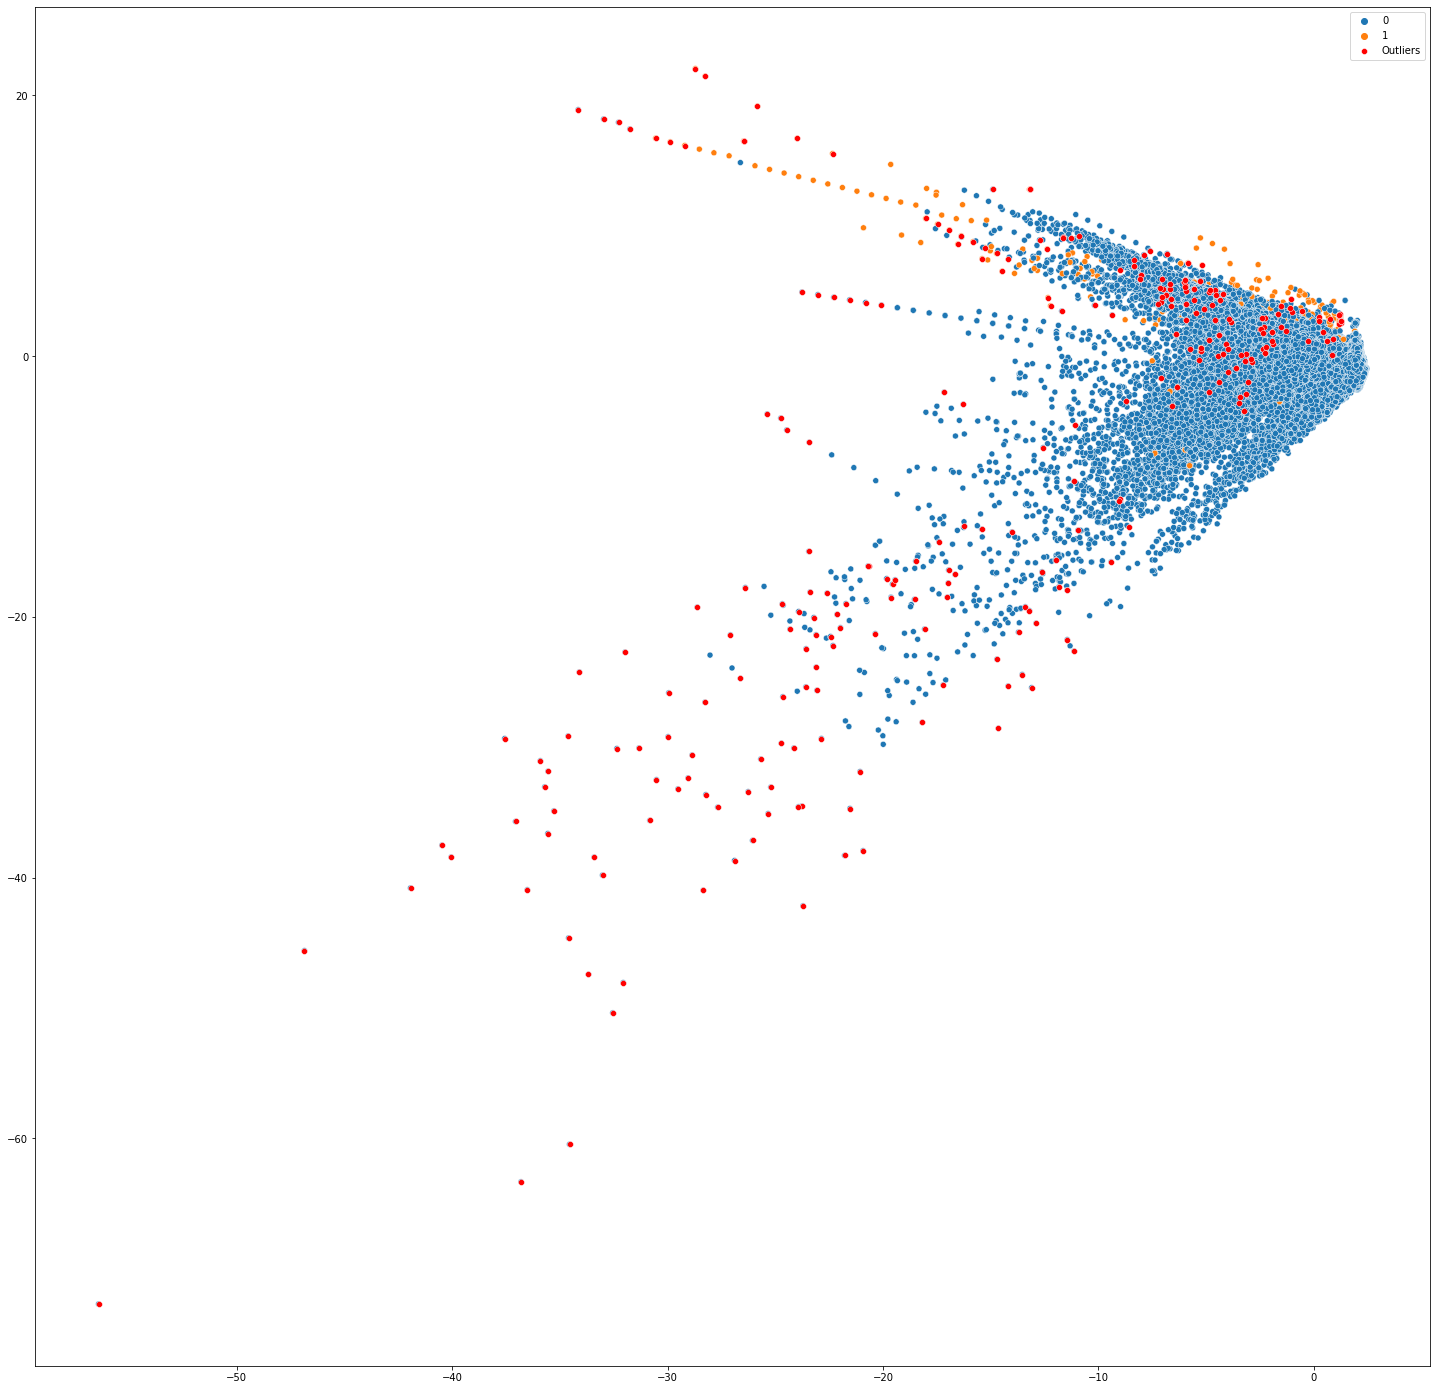

In [26]:
index = np.where(scores <= thresh)
outliers =X_reduced[index]

plt.figure(figsize=(25,25))
sns.scatterplot(X_reduced[:,0], X_reduced[:,1], hue=df['Class'])
sns.scatterplot(outliers[:,0],outliers[:,1], color='r', label ='Outliers')
plt.show()

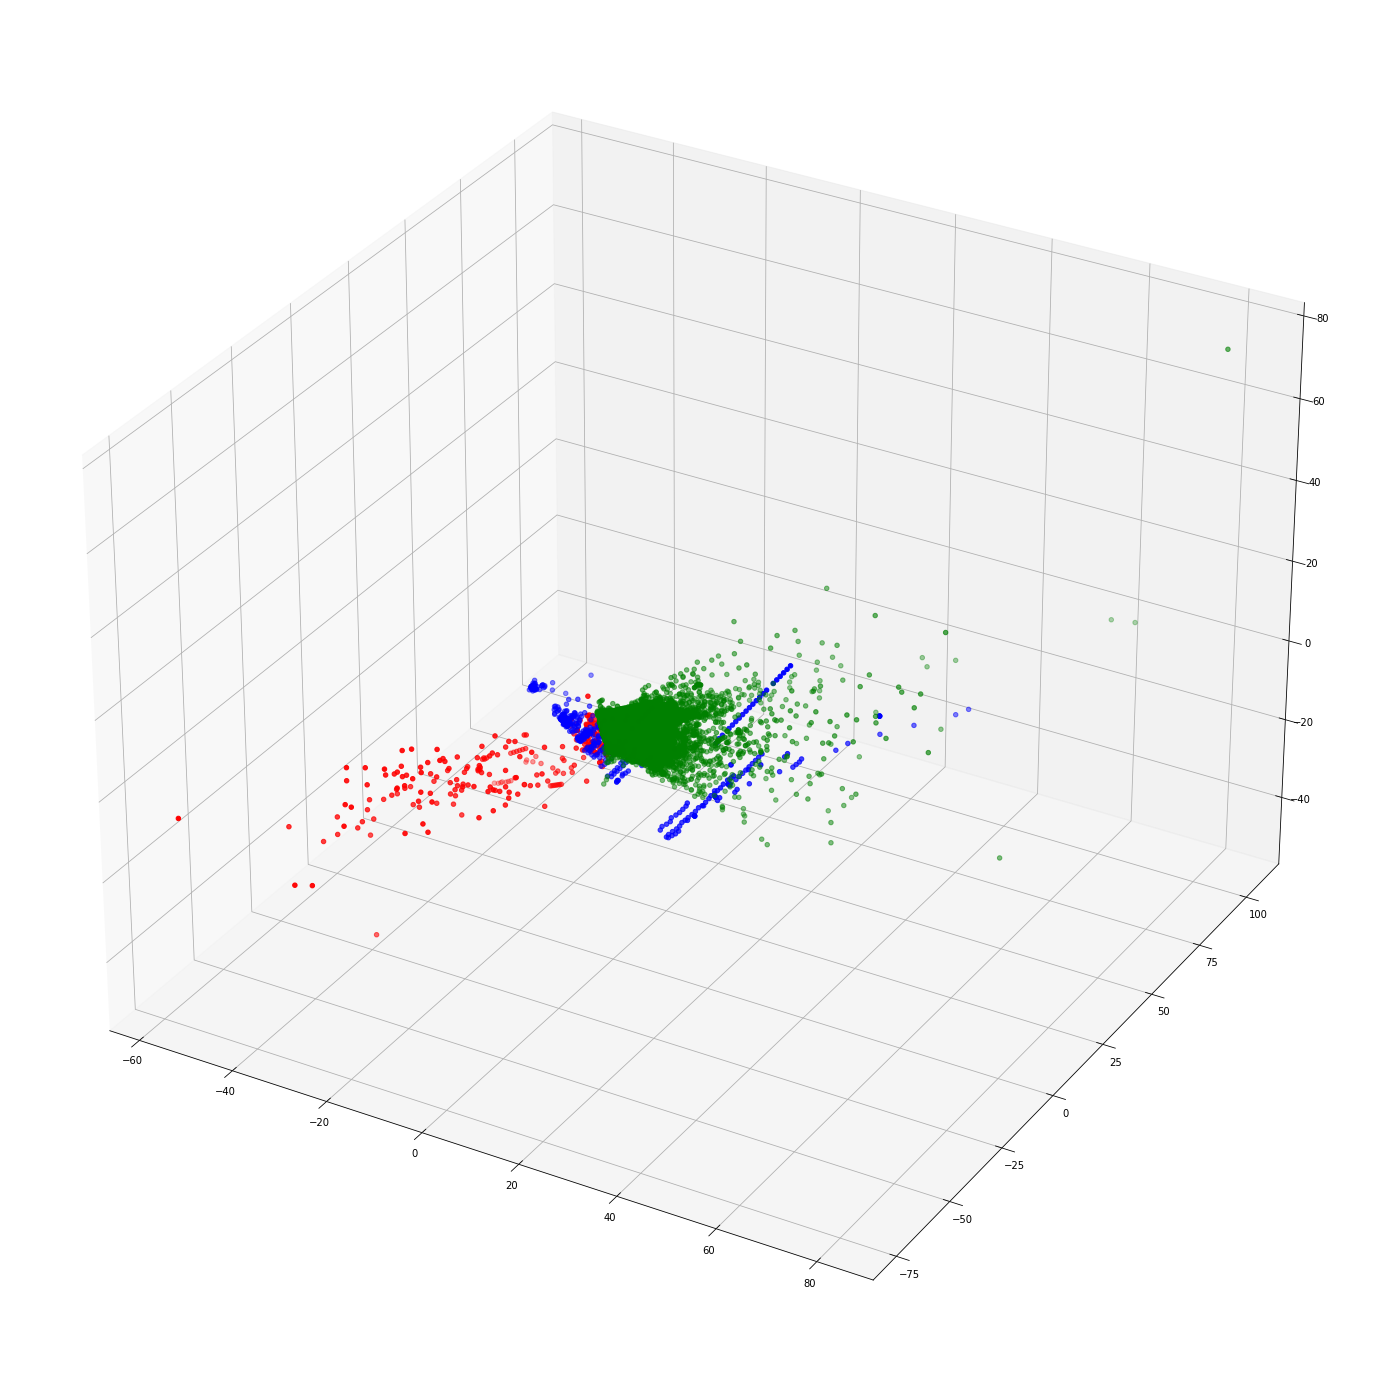

In [27]:
X = df.drop(columns=['Time','Class'])
y = df['Class']
scaler = StandardScaler()
X_reduced2 = scaler.fit_transform(X['Amount'].values.reshape(-1,1))
X['Amount'] = PCA(n_components=1).fit_transform(X_reduced2)


X3D_yes=PCA(n_components=3).fit_transform(X.loc[df[df.Class== 1].index.values])
X3D_no=PCA(n_components=3).fit_transform(X.loc[df[df.Class== 0].index.values])
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X3D_yes[:,0],X3D_yes[:,1],X3D_yes[:,2], color='b', label ='Kelas Pencurian')
ax.scatter(X3D_no[:,0],X3D_no[:,1],X3D_no[:,2], color='g', label ='Kelas Normal')
ax.scatter(outliers[:,0],outliers[:,1],outliers[:,2], color='r', label ='Outliers')

- Warna Biru = Kelas Pencurian
- Warna Hijau = Kelas Normal
- Warna Merah = Outliers

In [29]:
X_reduced

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  2.44964263e-01],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02, -3.42474541e-01],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  1.16068593e+00],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02, -8.18393021e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01, -3.13248531e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  5.14355311e-01]])

In [30]:
dce = pd.DataFrame(X_reduced)

In [31]:
dce.count().sum()

8259403

Anomali yang terdeteksi bisa terlihat dalam index ini, index ini adalah anomali terjauh yang terdeteksi dari gaussian mixture. Index ini adalah urutan dari tabel aslinya

In [32]:
abc = pd.DataFrame(index)

In [33]:
abc.count().sum()

285

Yang merah adalah outliers dimana di dataset antara V1 - V28 ternyata masih banyak outliers di data tersebut

Outliers pada dataset tersebut jika diitung dari v1 sampai v28 sejumlah 8.545 data dari total 284.000 data

In [34]:
gausMix.predict(X_reduced)

array([0, 7, 4, ..., 7, 0, 0], dtype=int64)

# BAYESIAN MIXTURE

<AxesSubplot:>

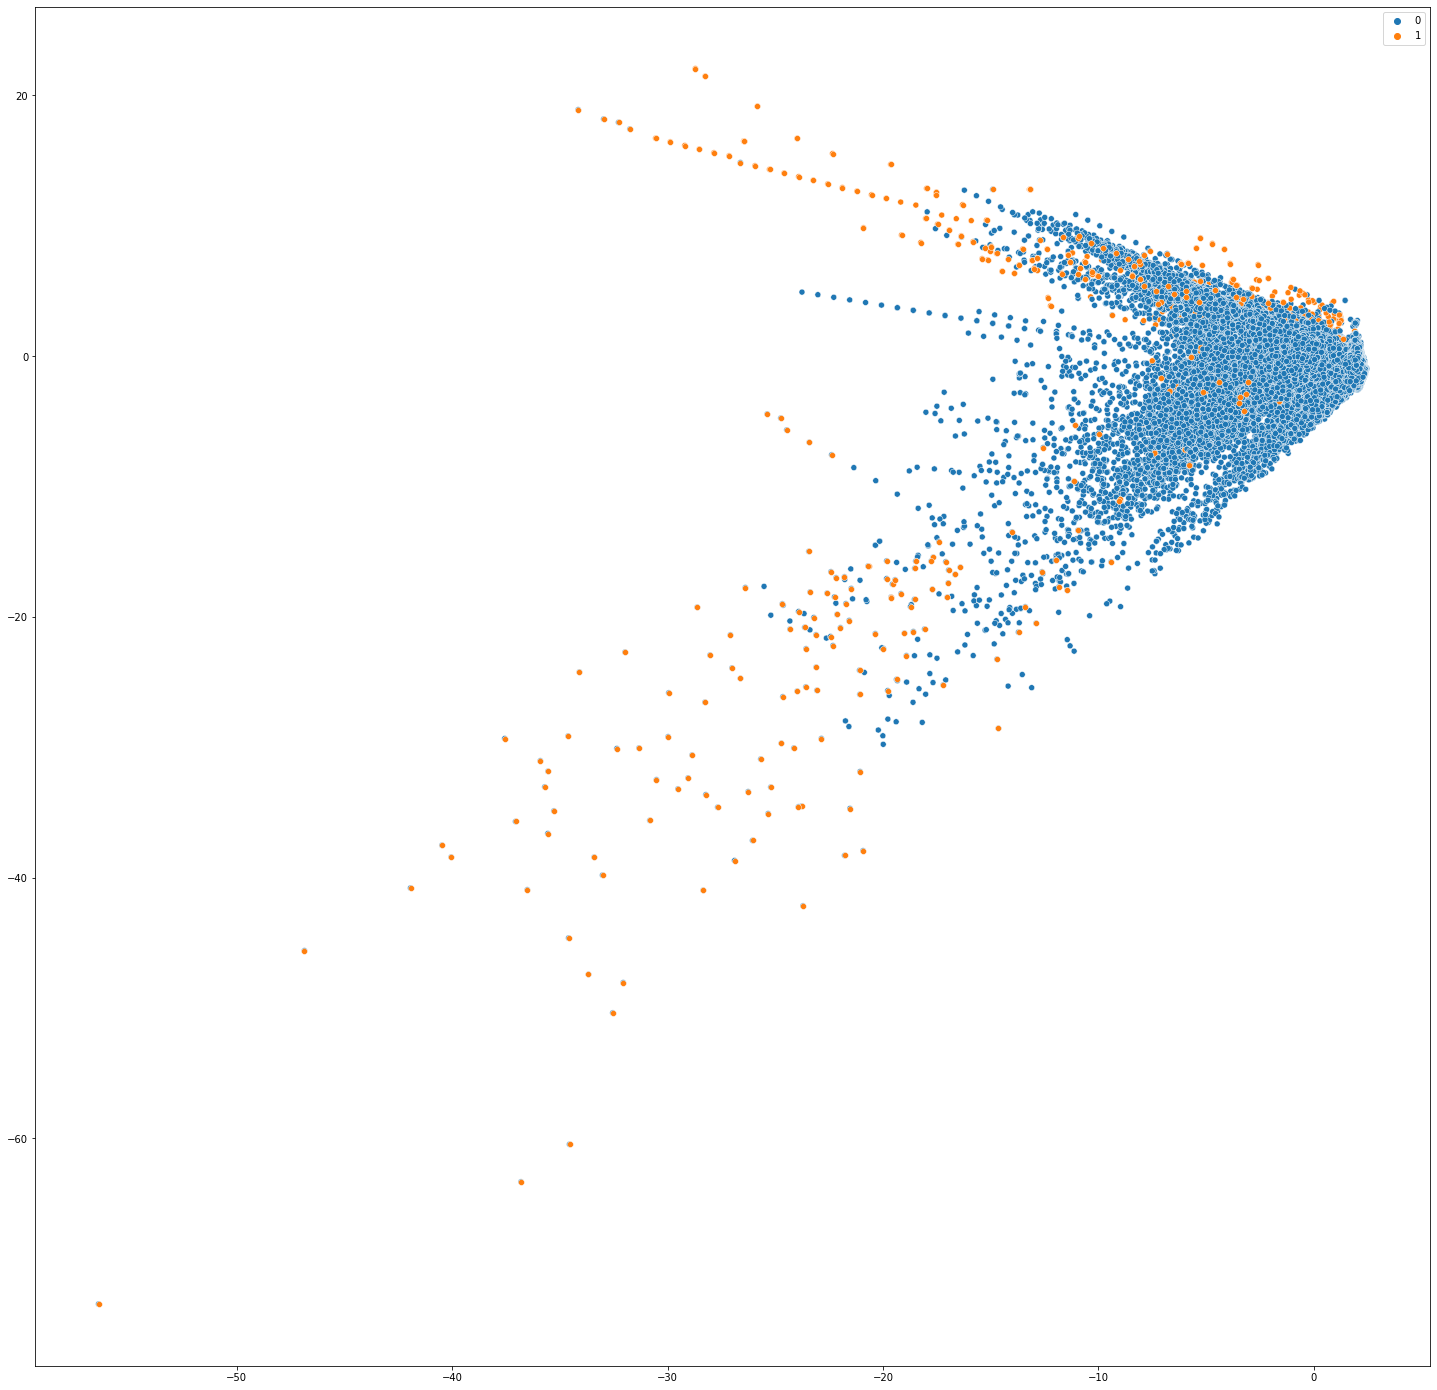

In [35]:
bgauss=BayesianGaussianMixture().fit(X_reduced)
scores = bgauss.score_samples(X_reduced)
thresh = np.quantile(scores, 0.001)
index = np.where(scores <= thresh)
outliers =X_reduced[index]

plt.figure(figsize=(25,25))
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1], hue=df['Class'])
sns.scatterplot(x=outliers[:,0],y=outliers[:,1])

# MODEL INFERENCE

In [36]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [37]:
sample = df.sample(10, random_state=50)

In [38]:
scaler1 = StandardScaler()
X_sample = scaler1.fit_transform(sample[['V1','V2', 'V3', 'V4', 'V5','V6','V7', 'V8','V9','V10',
                                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
                                    'V21','V22','V23','V24','V25','V26','V27','V28','Amount']])
gaussian =  gausMix.predict(X_sample)

<AxesSubplot:>

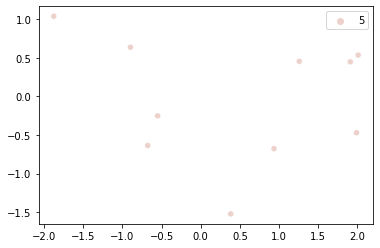

In [39]:
sns.scatterplot(x=X_reduced[sample.index,0], y=X_reduced[sample.index,1], hue=gaussian)

# MODEL ANALYSIS

In [40]:
df['Cluster'] = gausMix.predict(X_reduced)

In [41]:
df.set_index('Cluster')
df.groupby('Cluster').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95145.584430,-0.967553,0.904481,0.679268,-0.097345,0.237566,-0.227466,0.465473,0.204592,-0.063070,-0.174280,-0.062054,-0.059031,-0.031376,0.007441,-0.079914,0.034283,0.008020,-0.054777,0.155758,0.031107,-0.003704,0.144233,-0.073576,-0.046338,-0.157689,-0.016988,-0.038264,-0.017143,35.025858,0.000203
1,96034.970623,-0.554621,0.499960,0.785631,-0.067467,0.413450,-0.303978,0.555078,0.151492,-0.313189,-0.570428,-0.065818,-0.071546,-0.051963,0.020339,-0.113404,0.115849,-0.010886,-0.017484,0.119039,0.131103,0.046654,0.067669,0.039003,-0.052785,-0.190660,0.008998,0.127761,0.112800,58.609169,0.000222
2,96752.186606,-1.750005,-0.468719,0.495236,0.018300,0.111500,-0.011154,0.165550,-0.350503,-0.166663,-0.257809,-0.161820,0.081955,0.039400,0.099244,-0.097028,-0.466912,0.026947,0.446886,-0.115823,-0.219832,0.040852,0.021814,0.106866,-0.052523,-0.008834,0.071130,0.027269,-0.088201,167.862490,0.000904
3,94660.848846,-0.915718,0.601109,-0.843907,-1.243391,2.401991,3.595857,-0.253735,0.699451,-0.234897,-0.240058,-0.260768,-0.350672,-0.055004,0.043827,0.355229,0.063370,-0.116187,0.119114,0.137338,0.133241,-0.036057,-0.148991,-0.020086,0.830999,0.005922,-0.023777,0.006200,0.017495,42.723140,0.000000
4,96895.379325,1.157129,-1.285189,-0.129787,-1.047565,-0.918507,0.005646,-0.641535,0.001264,-1.063166,0.954433,-0.166610,-0.194606,0.230968,-0.149222,-0.048202,-0.961410,0.122169,0.747933,-0.402912,-0.171780,-0.182744,-0.298793,0.010892,-0.011052,-0.007662,0.020035,0.007120,0.016026,143.021760,0.000037
5,99249.816598,-3.777089,-2.018611,-0.577760,-0.779973,-0.390608,0.138211,-0.373371,-1.039182,-0.499525,0.802438,-0.007123,-0.344377,0.177085,-0.215746,-0.199697,0.197045,0.234730,-0.097486,-0.040110,-0.330686,-0.064398,0.060478,-0.021075,0.021187,0.038182,-0.137379,0.035521,-0.033408,354.531068,0.009189
6,80068.219157,-3.358553,2.868713,-1.438856,0.221856,-0.832695,-0.321825,-0.986350,-1.081544,0.700791,0.854469,0.319095,-0.031942,-0.001971,-0.473661,0.208497,-0.085513,0.081382,0.022738,-0.113666,0.426850,0.324379,-0.141488,0.177666,-0.197823,0.032179,-0.035071,-0.130757,-0.098494,27.340159,0.036313
7,94094.406076,1.470902,-0.366658,-0.475829,0.492647,-0.156013,-0.043304,-0.190678,0.021895,0.445815,-0.025861,0.125160,0.154789,-0.041564,0.062195,0.087581,0.248751,-0.055772,-0.231568,-0.006827,0.008840,0.008515,-0.018568,-0.002359,0.003453,0.151308,0.006771,-0.020038,-0.005557,84.235869,0.000401


- Cluster 0 = Rata-rata amount pada cluster ini adalah 100 
- Cluster 1 = Rata-rata amount pada cluster ini adalah 131
- Cluster 2 = Rata-rata amount pada cluster ini adalah 42 dan merupakan cluster yang tidak ada pencurian
- Cluster 3 = Rata-rata amount pada cluster ini adalah 110
- Cluster 4 = Rata-rata amount pada cluster ini adalah 20 dan merupakan yang terendah rata-rata amountnya
- Cluster 5 = Rata-rata amount pada cluster ini adalah 89
- Cluster 6 = Rata-rata amount pada cluster ini adalah 47 dan terindikasi sering melakukan pencurian ada di cluster 6
- Cluster 7 = Rata-rata amount pada cluster ini adalah 314 dan merupakan yang tertinggi rata-rata amountnya

# MODEL ANALYSIS

- Dalam pendeteksian anomali ditemukan anomali sebanyak 8545 data pada threshold 0.03
- Dalam pendeteksian anomali ditemukan anomali sebanyak 285 data pada threshold 0.001
- Dalam pendeteksian anomali ditemukan anomali sebanyak 29 data pada threshold 0.0001
- BIC dan AIC semakin rendah maka semakin bagus, dan semakin sedikit errornya
- AIC dan BIC jika diitung dari 2 - 8, ditemukan titik minimumnya di angka 8, sehingga akan dipakai angka tersebut untuk gaussian dalam jumlah komponen yang digunakan
- Semakin rendah thresholdnya, maka anomali yang terdeteksi pun berarti datanya sangat jauh dari data aslinya 
- Anomali dan outliers merupakan suatu hal yang berbeda. Outliers ini adalah titik data yang keluar dari rata-ratanya, sedangkan anomali merupakan bagian khusus dari outlier, bisa memiliki informasi khusus atau yang berguna
- Pada PCA 2 dimensi, tidak terlihat apakah anomali ini berjauhan dengan data aslinya atau tidak
- Pada PCA 3 dimensi, menjadi terlihat bahwa anomali ini merupakan outliers yang jauh dan terpisahkan dari data aslinya

# Overall Analysis

- Pada pendeteksian anomali menggunakan gaussian mixture jika ada outliers terdeteksi maka gaussian tersebut tetap menyebut outliers tersebut adalah outliers
- Pada pendeteksian anomali menggunakan bayesian mixture jika ada outliers terdeteksi, maka bayesian menyebut outliers sebagai kelas baru, atau outliers tersebut dianggap kelas pencurian
- Yang terindikasi sering melakukan pencurian ada di cluster 6
- Yang tidak mempunyai pencurian aset kartu kredit berada di cluster 2